<a href="https://colab.research.google.com/github/LaraNegri/EntregasPDI/blob/main/TP8/Practico8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 8

Creado por: Lara Negri

## Descripción del práctico

Implementar un aplicativo que permita abrir una imagen y con esta obtener:

• Downsampling X2 utilizando kernel constante, bilineal, y bicúbico.

• Upsampling X2 utilizando kernel constante, bilineal, y bicúbico.

• Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.

## Librerias requeridas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Funciones a utilizar

In [ ]:
# Función para leer una imagen y tenerla como Array numpy sin limitación uint8
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im
  
  # Obtener el canal R normalizado de una imagen
def get_R(im):
  R = im[:, :, 0]
  return R

  # Obtener el canal G normalizado de una imagen
def get_G(im):
  G = im[:, :, 1]
  return G

  # Obtener el canal B normalizado de una imagen
def get_B(im):
  B = im[:, :, 2]
  return B

def rgb_to_image(newR,newG,newB):
  Shape = newR.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = newR
  im_out[:,:,1] = newG
  im_out[:,:,2] = newB
  return im_out.astype(np.uint8)

## Selección de Imagen

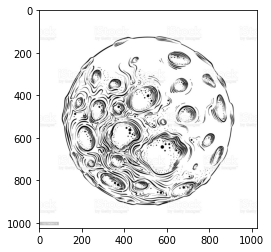

In [ ]:
#@title Selecccione la imagen { run: "auto" }

letras = 'https://www.bakerross.ie/media/catalog/product/cache/789e0244c80348f78faf6f424fee0e0f/e/v/ev9035-new.jpg'
skymap ='https://previews.123rf.com/images/shooarts/shooarts1406/shooarts140600082/29384953-high-detailed-sky-map-of-northern-hemisphere-with-names-of-stars-and-constellations-colored-vector.jpg'
moon = 'https://media.istockphoto.com/vectors/hand-drawn-sketch-of-moon-planet-in-black-isolated-on-white-detailed-vector-id1027909474'
Imagen = 'moon' #@param ["letras", "skymap", "moon"]

if Imagen == 'letras':
  im = get_image(letras)
  plt.imshow(im, 'gray') 
  plt.show()
elif Imagen == 'skymap':
  im = get_image(skymap)
  plt.imshow(im, 'gray') 
  plt.show()
elif Imagen == 'moon':
  im = get_image(moon)
  plt.imshow(im, 'gray')
  plt.show()

In [ ]:
 # Obtenemos la luminancia Y de la imagen

#Primero necesito los valores de R, G, B de las imágenes

R = get_R(im)/255
G = get_G(im)/255
B = get_B(im)/255

#Obtengo los valores de YIQ
Y = (0.299*R + 0.587*G + 0.114*B)
I = 0.595716*R + -0.274453*G + -0.321263*B
Q = 0.211456*R + -0.522591*G + 0.311135*B

Y = np.array(np.clip(Y, 0, 1))

In [ ]:
x, z = Y.shape

Y = np.pad(Y, [(1, 1), (1, 1)], mode='constant', constant_values=0)

l, m = Y.shape
finalM = np.zeros((l, m), dtype=np.float)

##Upsampling x2

### Definición de distintas funciones

In [ ]:
def bilineal_up(x,z,Y):
  bili = np.zeros((2*x,2*z))
  for i in range(x):
    for j in range(z):
        bili[2*i,2*j] = Y[i,j]*255            
        bili[2*i+1,2*j] = ((Y[i,j]+Y[i+1,j])/2)*255
        bili[2*i,2*j+1] = ((Y[i,j]+Y[i,j+1])/2)*255
        bili[2*i+1,2*j+1] = ((Y[i,j]+Y[i,j+1]+Y[i+1,j]+Y[i+1,j+1])/4)*255
  bili = np.clip(bili, 0, 255)
  bili.astype(np.uint8)
  plt.imshow(bili,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/bilinealup.bmp', bili, cmap = 'gray')
  return bili[i,j]

def constante_up(x,z,Y):
  const = np.zeros((2*x,2*z))
  for i in range(x):
    for j in range(z):
        const[2*i:2*i+2,2*j:2*j+2] = (Y[i,j])*255
  const = np.clip(const, 0, 255)
  const.astype(np.uint8)
  plt.imshow(const, 'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/constanteup.bmp', const, cmap = 'gray')
  return const[i,j]

def bicubico_up(x,z,Y):
  Ypad = np.pad(Y, [(2, 1), (2, 1)], mode='constant', constant_values=0)
  bicub = np.zeros((2*x,2*z))
  for i in range(x):
    for j in range(z):
      bicub[2*i,2*j] = ((-1/8)*Ypad[i-2, j] +(5/8)*Ypad[i-1, j] +(5/8)*Ypad[i+1, j] -(1/8)*Ypad[i+2, j])*255
  bicub = np.clip(bicub, 0, 255)
  bicub.astype(np.uint8)
  plt.imshow(bicub, 'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/bicubicoup.bmp', bicub, cmap = 'gray')
  return bicub[i,j]

### Selección de Kernels Upsampling x2

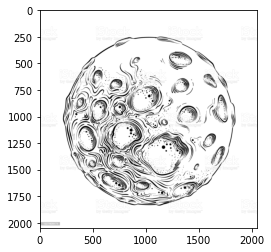

In [ ]:
#@title Selecccione el kernel{ run: "auto" }
kernel = 'constante' #@param ["bilineal", "constante", "bicubico"]

if kernel == 'bilineal':
  bilineal_up(x, z, Y)
elif kernel == 'constante':
  constante_up(x, z, Y)
elif kernel == 'bicubico':
  bicubico_up(x, z, Y)

##Downsamplingx2

### Definición de funciones

In [ ]:
newx = np.int(x/2)
newz = np.int(z/2)

In [ ]:
def bilineal_down(x,z,Y):
  bili_down = np.zeros((newx, newz))
  for i in range(newx):
    for j in range(newz):
        bili_down[i,j] = ((Y[2*i,2*j]+Y[2*i+1,2*j]+Y[2*i,2*j+1]+Y[2*i+1,2*j+1])/4)*255
  bili_down = np.clip(bili_down, 0, 255)
  bili_down.astype(np.uint8)
  plt.imshow(bili_down,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/bilinealdown.bmp', bili_down, cmap = 'gray')
  return bili_down[i,j]

def constante_down(x,z,Y):
  const_down = np.zeros((newx, newz))
  for i in range(newx):
    for j in range(newz):
        const_down[i,j] = (Y[2*i,2*j])*255
  const_down = np.clip(const_down, 0, 255)
  const_down.astype(np.uint8)
  plt.imshow(const_down, 'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/constantedown.bmp', const_down, cmap = 'gray')
  return const_down[i,j]

def bicubico_down(x,z,Y):
  bicub_down = np.zeros((newx, newz))
  Ypad = np.pad(Y, [(2, 1), (2, 1)], mode='constant', constant_values=0)
  for i in range(newx-1):
    for j in range(newz-1):
        bicub_down[i,j] = ((-1/8)*Ypad[2*i-2, 2*j] +(5/8)*Ypad[2*i-1, 2*j] +(5/8)*Ypad[2*i+1, 2*j] -(1/8)*Ypad[2*i+2, 2*j])*255
  bicub_down = np.clip(bicub_down, 0, 255)
  bicub_down.astype(np.uint8)
  plt.imshow(bicub_down, 'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/bicubicodown.bmp', bicub_down, cmap = 'gray')
  return bicub_down[i,j]

### Selección de Kernels para Downsamplingx2

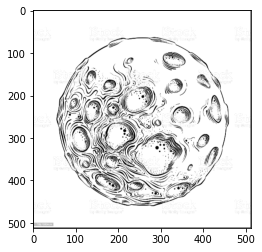

In [ ]:
#@title Selecccione el kernel{ run: "auto" }
kernel = 'bicubico' #@param ["bilineal", "constante", "bicubico"]

if kernel == 'bilineal':
  bilineal_down(x, z, Y)
elif kernel == 'constante':
  constante_down(x, z, Y)
elif kernel == 'bicubico':
  bicubico_down(x, z, Y)

## Cuantización

### Definimos las funciones a utilizar

In [ ]:
def dithering(x, z, Y):
  dith = np.zeros((x, z))
  for i in range(x):
    for j in range(z):
      dith[i,j] = (Y[i,j]*(n-1) + (np.random.rand() -0.5 )/(n-1))*255
  dith = np.clip(dith, 0, 255)
  dith.astype(np.uint8)
  plt.imshow(dith, 'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/dithering.bmp', dith, cmap = 'gray')
  return dith[i,j]

def unif_cuanti(n, b): 
  cuanti_values = np.linspace(0,1,n)
  dif = (np.abs(cuanti_values - b)).argmin()
  return cuanti_values[dif]

def difusion(x,z, Y):
  error = 0
  difu = np.zeros((x,z))
  for i in range(x):
    for j in range(z):
      difu[i,j] = (np.round(Y[i,j] - error,1))*255
      error = error + difu[i,j]/255 - Y[i,j]
  print(error)
  difu = np.clip(difu, 0, 255)
  difu.astype(np.uint8)
  plt.imshow(difu, 'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/difusion.bmp', difu, cmap = 'gray')
  return difu[i,j]

### Seleccione el número de niveles de cuantización que desea

In [ ]:
#@title Niveles de cuantización{ run: "auto" }
n = 6 #@param {type:"slider", min:0, max:200, step:1}

### Seleccione el tipo de cuantización que desea

In [ ]:
#@title Selecccione el kernel{ run: "auto" }
cuantizacion = 'dithering' #@param ["dithering", "uniforme", "difusion"]


#### Dithering

255.0

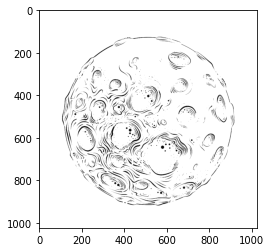

In [ ]:
dithering(x, z, Y)

#### Cuantización uniforme

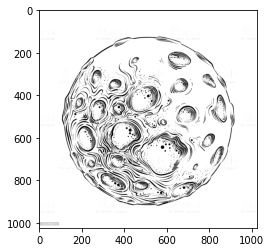

In [ ]:
uniforme = np.zeros((x,z))

for i in range(x):
  for j in range(z):
    uniforme[i,j] = (unif_cuanti(n,Y[i,j]))

uniforme.astype(np.float64)
plt.imshow(uniforme, 'gray')


#### Difusión del error

0.04901960788878734


255.0

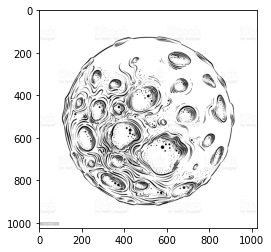

In [ ]:
difusion(x,z,Y)

## Gráficos comparativos

In [ ]:
biliup = io.imread('/content/drive/MyDrive/Imagenes PDI/bilinealup.bmp')
constup = io.imread('/content/drive/MyDrive/Imagenes PDI/constanteup.bmp')
bicubup = io.imread('/content/drive/MyDrive/Imagenes PDI/bicubicoup.bmp')

bilidown = io.imread('/content/drive/MyDrive/Imagenes PDI/bilinealdown.bmp')
constdown = io.imread('/content/drive/MyDrive/Imagenes PDI/constantedown.bmp')
bicubdown = io.imread('/content/drive/MyDrive/Imagenes PDI/bicubicodown.bmp')

dither = io.imread('/content/drive/MyDrive/Imagenes PDI/dithering.bmp')
difus = io.imread('/content/drive/MyDrive/Imagenes PDI/difusion.bmp')

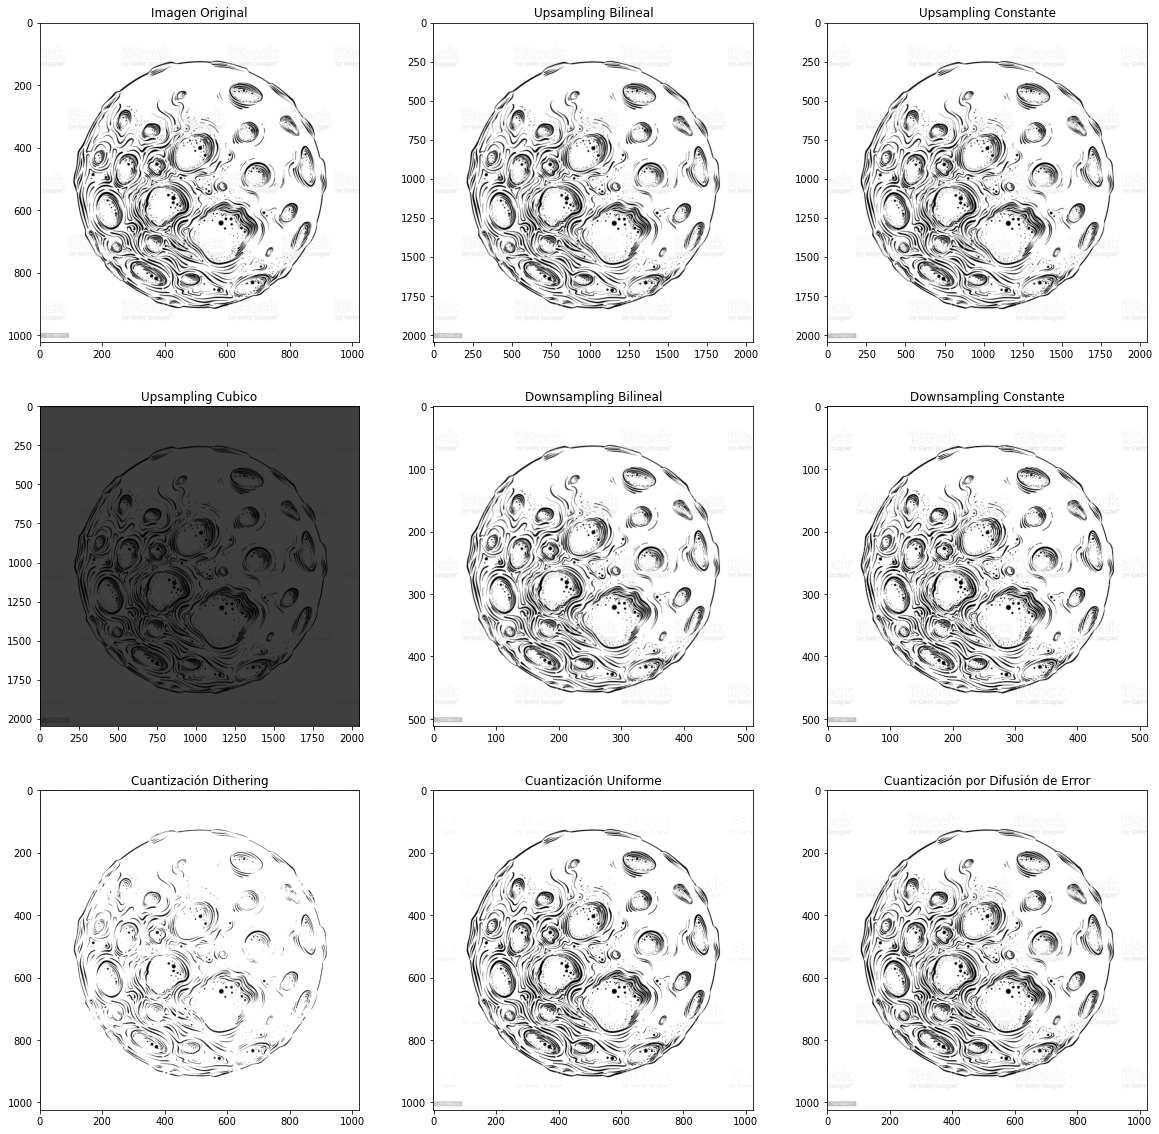

In [ ]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(20,20)
ax[0,0].imshow(im, 'gray')
ax[0,0].set_title('Imagen Original')
ax[0,1].imshow(biliup, 'gray')
ax[0,1].set_title('Upsampling Bilineal')
ax[0,2].imshow(constup, 'gray')
ax[0,2].set_title('Upsampling Constante')

ax[1,0].imshow( bicubup, 'gray')
ax[1,0].set_title('Upsampling Cubico')
ax[1,1].imshow(bilidown, 'gray')
ax[1,1].set_title('Downsampling Bilineal')
ax[1,2].imshow(constdown, 'gray')
ax[1,2].set_title('Downsampling Constante')

ax[2,0].imshow(dither, 'gray')
ax[2,0].set_title('Cuantización Dithering')
ax[2,1].imshow(uniforme, 'gray')
ax[2,1].set_title('Cuantización Uniforme')
ax[2,2].imshow(difus, 'gray')
ax[2,2].set_title('Cuantización por Difusión de Error')

plt.show()

## Conclusiones

Cómo podemos ver en los gráficos comparativos, a excepción del upsampling bicúbico, en el resto de los procesos, no se observa pérdida notable de la información de la imagen. Una excepción puede ser la Cuantización con dithering, en la cual se pierden ciertos detalles mínimimos.

Por cómo se realizan estos procesos, creo que si se utilizan imágenes con menos definición (menor cantidad de píxeles), el resultado va a ser de menor calidad. Esto sucede porque si, para una imagen "grande" y una "pequeña" modificamos la misma cantidad X de píxeles, en la imagen grande, el porcentaje X/(pix totales) Va a ser menor que para la imagen más pequeña, por lo tanto se va a alterar un porcentaje menor de la imagen, es decir, se van a realizar menos modificaciones en la misma. 

Por último, vemos que, a pesar de que para cuantización con pocos niveles el resultado es peor, incluso usando 4 o 6 niveles, la imagen obtenida es prácticamente igual a la anterior (en términos de lo que puede observar el usuario). Lo que nos habla de que el proceso es muy eficiente para lograr lo que quiere, reducir el tamaño de la imagen, modificandola lo menos posible.